**Imports**

In [0]:
!pip install scikit-plot

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import scikitplot as skplt
%matplotlib inline

In [0]:
!pip install pandas_ml

In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Dataset Loading**

In [0]:
train_df  = pd.read_csv('/content/drive/My Drive/ML/sign_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/ML/sign_mnist_test.csv')

**Training Data Pre-processing**

In [0]:
labels = train_df["label"].values
train_df.drop(["label"], inplace=True, axis=1)
images = np.array(train_df.iloc[:, :])
images = np.array([np.reshape(i, (28, 28)) for i in images])
images_flat = np.array([i.flatten() for i in images])
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images_flat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Test Data Pre-processing**

In [0]:
test_labels = test_df["label"].values
test_df.drop(["label"], inplace=True, axis=1)
images = np.array(test_df.iloc[:, :])
images = np.array([np.reshape(i, (28, 28)) for i in images])
images_flat = np.array([i.flatten() for i in images])
test_images_scaled = scaler.transform(images_flat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Class Labels**

In [0]:
classes = []
unique_val = np.array(labels)

unique_val = np.unique(unique_val)
for i in unique_val:
  classes.append(chr(i+65))
  

print(classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


**Class Balance**

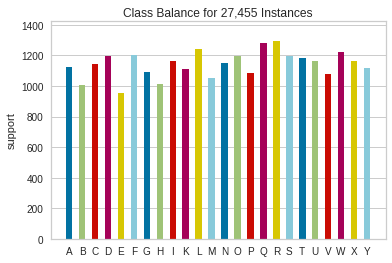

In [0]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=classes)
visualizer.fit(labels)
visualizer.poof('/content/drive/My Drive/ML/Graphs/ClassBalance.png', dpi=200, format='png', bbox_inches='tight')

**LogisticRegression**

In [0]:

from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
visualizer = ClassificationReport(model, support='percent')

visualizer.fit(images_scaled, labels)  
print("Accuracy")
print(visualizer.score(test_images_scaled, test_labels))  
g = visualizer.poof('/content/drive/My Drive/ML/Graphs/Report_LogisticRegression_classif.png', dpi=200, format='png', bbox_inches='tight')


In [0]:
cm = ConfusionMatrix(model, percent=False)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_LogisticRegression.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))


**Support Vector Machines (SVM)**

Accuracy
0.8053541550474066


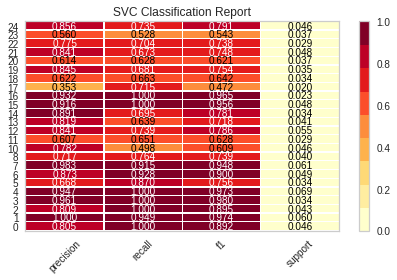

In [0]:
from sklearn.svm import SVC


model = SVC(kernel='linear')
visualizer = ClassificationReport(model, support='percent')

visualizer.fit(images_scaled, labels)  
print("Accuracy")
print(visualizer.score(test_images_scaled, test_labels))  
g = visualizer.poof('/content/drive/My Drive/ML/Graphs/Report_SVM_classif.png', dpi=200, format='png', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       331
           1       1.00      0.95      0.97       432
           2       0.81      1.00      0.89       310
           3       0.96      1.00      0.98       245
           4       0.95      1.00      0.97       498
           5       0.67      0.87      0.76       247
           6       0.87      0.93      0.90       348
           7       0.98      0.92      0.95       436
           8       0.72      0.76      0.74       288
          10       0.78      0.50      0.61       331
          11       0.61      0.65      0.63       209
          12       0.84      0.74      0.79       394
          13       0.82      0.64      0.72       291
          14       0.89      0.70      0.78       246
          15       0.92      1.00      0.96       347
          16       0.93      1.00      0.96       164
          17       0.35      0.72      0.47       144
          18       0.62    

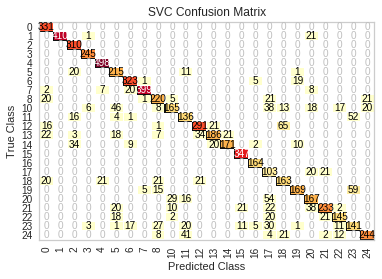

In [0]:
cm = ConfusionMatrix(model, percent=False)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_SVM.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))

 **Naive Bayes**

Accuracy
0.3898494143892917


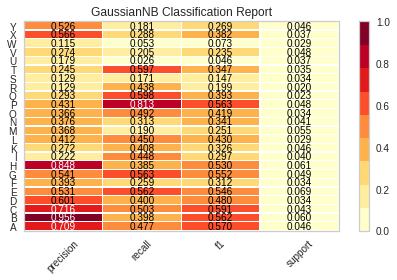

In [0]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB()
visualizer = ClassificationReport(model, support='percent', classes=classes)

visualizer.fit(images_scaled, labels)  
print("Accuracy")
print(visualizer.score(test_images_scaled, test_labels))  
g = visualizer.poof('/content/drive/My Drive/ML/Graphs/Report_naive_bayes.png', dpi=200, format='png', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.71      0.48      0.57       331
           1       0.96      0.40      0.56       432
           2       0.72      0.50      0.59       310
           3       0.60      0.40      0.48       245
           4       0.53      0.56      0.55       498
           5       0.39      0.26      0.31       247
           6       0.54      0.56      0.55       348
           7       0.85      0.39      0.53       436
           8       0.22      0.45      0.30       288
          10       0.27      0.41      0.33       331
          11       0.41      0.45      0.43       209
          12       0.37      0.19      0.25       394
          13       0.38      0.31      0.34       291
          14       0.37      0.49      0.42       246
          15       0.43      0.81      0.56       347
          16       0.29      0.60      0.39       164
          17       0.13      0.44      0.20       144
          18       0.13    

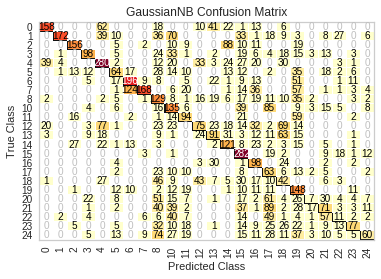

In [0]:
cm = ConfusionMatrix(model, percent=False, labels=classes)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_naive_bayes.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))

**KNN**

Accuracy
0.8103736754043502


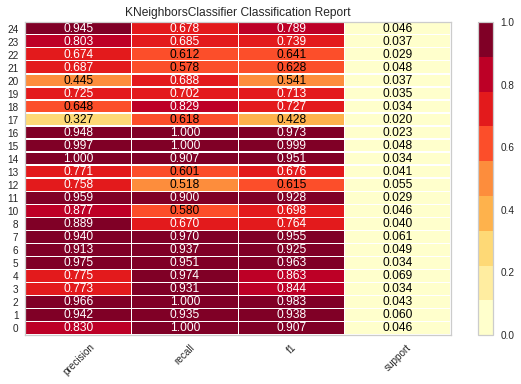

In [0]:
from sklearn import neighbors


model = neighbors.KNeighborsClassifier(n_neighbors=5)
visualizer = ClassificationReport(model, support='percent')

visualizer.fit(images_scaled, labels)  
print("Accuracy")
print(visualizer.score(test_images_scaled, test_labels))  
g = visualizer.poof('/content/drive/My Drive/ML/Graphs/Report_KNN.png', dpi=200, format='png', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       331
           1       0.94      0.94      0.94       432
           2       0.97      1.00      0.98       310
           3       0.77      0.93      0.84       245
           4       0.77      0.97      0.86       498
           5       0.98      0.95      0.96       247
           6       0.91      0.94      0.92       348
           7       0.94      0.97      0.95       436
           8       0.89      0.67      0.76       288
          10       0.88      0.58      0.70       331
          11       0.96      0.90      0.93       209
          12       0.76      0.52      0.62       394
          13       0.77      0.60      0.68       291
          14       1.00      0.91      0.95       246
          15       1.00      1.00      1.00       347
          16       0.95      1.00      0.97       164
          17       0.33      0.62      0.43       144
          18       0.65    

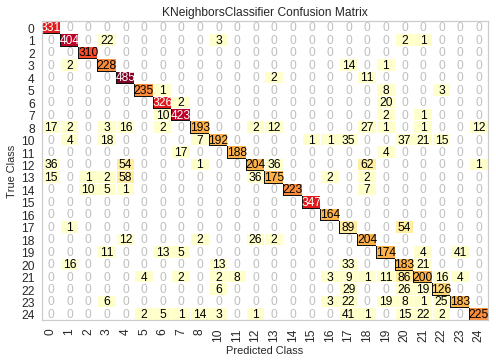

In [0]:
 cm = ConfusionMatrix(model, percent=False)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_KNN.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))

**K Means**

In [0]:
print(classificationReport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.07      0.06      0.06       432
           2       0.00      0.00      0.00       310
           3       0.00      0.00      0.00       245
           4       0.05      0.06      0.05       498
           5       0.00      0.00      0.00       247
           6       0.00      0.00      0.00       348
           7       0.08      0.05      0.06       436
           8       0.00      0.00      0.00       288
           9       0.00      0.00      0.00         0
          10       0.05      0.08      0.06       331
          11       0.05      0.07      0.06       209
          12       0.00      0.00      0.00       394
          13       0.00      0.00      0.00       291
          14       0.05      0.04      0.04       246
          15       0.07      0.05      0.06       347
          16       0.02      0.04      0.02       164
          17       0.00    

Accuracy : 0.02928053541550474


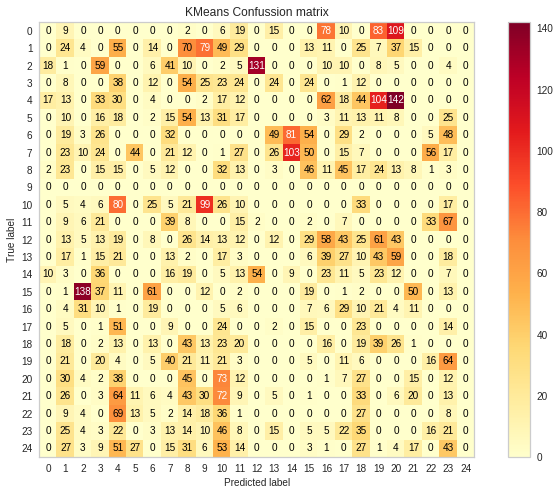

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


NameError: ignored

In [0]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import scikitplot as skplt
from pylab import figure, axes, pie, title, show

model = KMeans(n_clusters=24)
model.fit(images_scaled, labels)  
y_pred = model.predict(test_images_scaled)


print("Accuracy : "+ str(accuracy_score(test_labels,y_pred))) 

skplt.metrics.plot_confusion_matrix(test_labels, y_pred, cmap='YlOrRd', title="KMeans Confussion matrix",  figsize=(12, 8))

plt.savefig('/content/drive/My Drive/ML/Graphs/Matrix_KMeans.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

classificationReport = classification_report(test_labels, y_pred)



In [0]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

In [0]:
cm = ConfusionMatrix(model, percent=False)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_KMeans.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))

**Neural Network**

Accuracy
0.7204406023424428


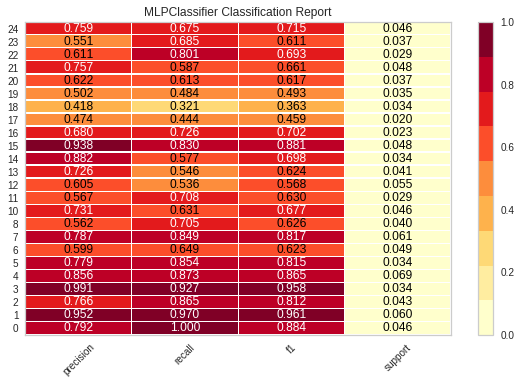

In [0]:
from sklearn.neural_network import MLPClassifier


model = MLPClassifier(hidden_layer_sizes=(30,30,30))
visualizer = ClassificationReport(model, support='percent')

visualizer.fit(images_scaled, labels)  
print("Accuracy")
print(visualizer.score(test_images_scaled, test_labels))  
g = visualizer.poof('/content/drive/My Drive/ML/Graphs/Report_Nureletwor.png', dpi=200, format='png', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       331
           1       0.95      0.97      0.96       432
           2       0.77      0.86      0.81       310
           3       0.99      0.93      0.96       245
           4       0.86      0.87      0.86       498
           5       0.78      0.85      0.81       247
           6       0.60      0.65      0.62       348
           7       0.79      0.85      0.82       436
           8       0.56      0.70      0.63       288
          10       0.73      0.63      0.68       331
          11       0.57      0.71      0.63       209
          12       0.60      0.54      0.57       394
          13       0.73      0.55      0.62       291
          14       0.88      0.58      0.70       246
          15       0.94      0.83      0.88       347
          16       0.68      0.73      0.70       164
          17       0.47      0.44      0.46       144
          18       0.42    

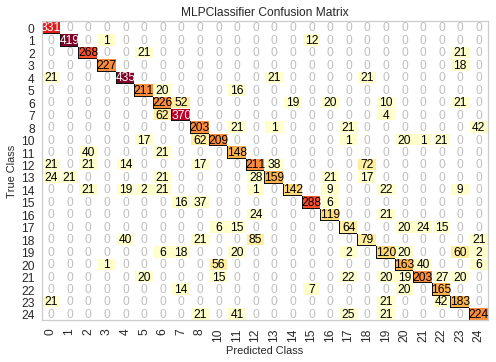

In [0]:
cm = ConfusionMatrix(model, percent=False)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_Nureletwor.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))

**Decision Tree Classifier**

Accuracy
0.43195761293920804


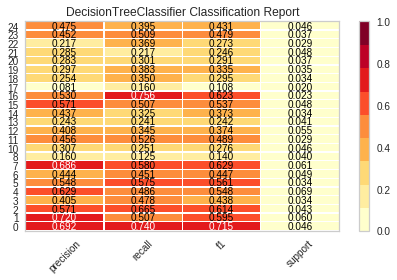

In [0]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

visualizer = ClassificationReport(model, support='percent')

visualizer.fit(images_scaled, labels)  
print("Accuracy")
print(visualizer.score(test_images_scaled, test_labels))  
g = visualizer.poof('/content/drive/My Drive/ML/Graphs/Report_DecisionTreeClassifier.png', dpi=200, format='png', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       331
           1       0.72      0.51      0.60       432
           2       0.57      0.66      0.61       310
           3       0.40      0.48      0.44       245
           4       0.63      0.49      0.55       498
           5       0.55      0.57      0.56       247
           6       0.44      0.45      0.45       348
           7       0.69      0.58      0.63       436
           8       0.16      0.12      0.14       288
          10       0.31      0.25      0.28       331
          11       0.46      0.53      0.49       209
          12       0.41      0.35      0.37       394
          13       0.24      0.24      0.24       291
          14       0.44      0.33      0.37       246
          15       0.57      0.51      0.54       347
          16       0.53      0.76      0.62       164
          17       0.08      0.16      0.11       144
          18       0.25    

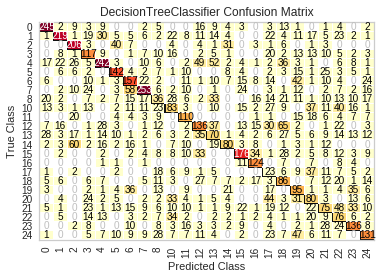

In [0]:
cm = ConfusionMatrix(model, percent=False)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_DecisionTreeClassifier.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))

**Random Forest Classifier**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy
0.6638315672058004


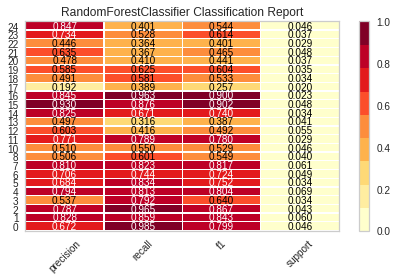

In [0]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()

visualizer = ClassificationReport(model, support='percent')

visualizer.fit(images_scaled, labels)  
print("Accuracy")
print(visualizer.score(test_images_scaled, test_labels))  
g = visualizer.poof('/content/drive/My Drive/ML/Graphs/Report_RandomForestClassifier.png', dpi=200, format='png', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       331
           1       0.83      0.86      0.84       432
           2       0.79      0.96      0.87       310
           3       0.54      0.79      0.64       245
           4       0.79      0.81      0.80       498
           5       0.68      0.83      0.75       247
           6       0.71      0.74      0.72       348
           7       0.81      0.82      0.82       436
           8       0.51      0.60      0.55       288
          10       0.51      0.55      0.53       331
          11       0.77      0.79      0.78       209
          12       0.60      0.42      0.49       394
          13       0.50      0.32      0.39       291
          14       0.82      0.67      0.74       246
          15       0.93      0.88      0.90       347
          16       0.84      0.96      0.90       164
          17       0.19      0.39      0.26       144
          18       0.49    

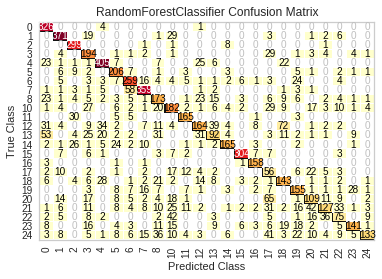

In [0]:
cm = ConfusionMatrix(model, percent=False)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_RandomForestClassifier.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))

**AdaBoost Classifier**

Accuracy
0.31553262688232014


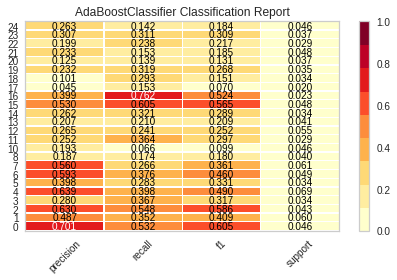

In [0]:
from sklearn import ensemble
model = ensemble.AdaBoostClassifier()

visualizer = ClassificationReport(model, support='percent')

visualizer.fit(images_scaled, labels)  
print("Accuracy")
print(visualizer.score(test_images_scaled, test_labels))  
g = visualizer.poof('/content/drive/My Drive/ML/Graphs/Report_AdaBoostClassifier.png', dpi=200, format='png', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.70      0.53      0.60       331
           1       0.49      0.35      0.41       432
           2       0.63      0.55      0.59       310
           3       0.28      0.37      0.32       245
           4       0.64      0.40      0.49       498
           5       0.40      0.28      0.33       247
           6       0.59      0.38      0.46       348
           7       0.56      0.27      0.36       436
           8       0.19      0.17      0.18       288
          10       0.19      0.07      0.10       331
          11       0.25      0.36      0.30       209
          12       0.26      0.24      0.25       394
          13       0.21      0.21      0.21       291
          14       0.26      0.32      0.29       246
          15       0.53      0.61      0.57       347
          16       0.40      0.76      0.52       164
          17       0.05      0.15      0.07       144
          18       0.10    

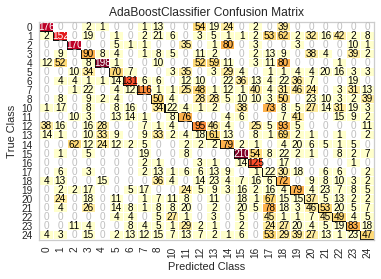

In [0]:
cm = ConfusionMatrix(model, percent=False)
cm.score(test_images_scaled, test_labels)

c = cm.poof('/content/drive/My Drive/ML/Graphs/Matrix_AdaBoostClassifier.png', dpi=200, format='png', bbox_inches='tight')
y_pred = visualizer.predict(test_images_scaled)
print(classification_report(test_labels, y_pred))